In [1]:
from  google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import nltk
import numpy as np
from sklearn.decomposition import TruncatedSVD
import torch
START_TOKEN = '<start>'
END_TOKEN = '<end>'

In [56]:
##  training data preprocessing



In [57]:
import csv
import nltk
nltk.download('punkt')

# Assuming you want to use NLTK's word_tokenize() function for tokenization
from nltk.tokenize import word_tokenize

train_data = []

# Opening the CSV file and reading the data
with open('/content/drive/My Drive/NLP/A_3/train.csv', mode='r') as file:
    csvFile = csv.reader(file)
    train_data = [str(line[1]) for line in csvFile]
    train_data=train_data[1:]


train_data = [[START_TOKEN]+word_tokenize(line)+[END_TOKEN ]for line in train_data[:10000]]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
pprint.pprint(train_data[:3], compact=True, width=100)


[['<start>', 'Reuters', '-', 'Short-sellers', ',', 'Wall', 'Street', "'s", 'dwindling\\band', 'of',
  'ultra-cynics', ',', 'are', 'seeing', 'green', 'again', '.', '<end>'],
 ['<start>', 'Reuters', '-', 'Private', 'investment', 'firm', 'Carlyle', 'Group', ',', '\\which',
  'has', 'a', 'reputation', 'for', 'making', 'well-timed', 'and', 'occasionally\\controversial',
  'plays', 'in', 'the', 'defense', 'industry', ',', 'has', 'quietly', 'placed\\its', 'bets', 'on',
  'another', 'part', 'of', 'the', 'market', '.', '<end>'],
 ['<start>', 'Reuters', '-', 'Soaring', 'crude', 'prices', 'plus', 'worries\\about', 'the',
  'economy', 'and', 'the', 'outlook', 'for', 'earnings', 'are', 'expected', 'to\\hang', 'over',
  'the', 'stock', 'market', 'next', 'week', 'during', 'the', 'depth', 'of', 'the\\summer',
  'doldrums', '.', '<end>']]


In [59]:
import re
def preprocess_text(text):

  text = text.lower()
  text = text.strip()
  text = text.replace('.', ' <PERIOD> ')
  text = text.replace(',', ' <COMMA> ')
  text = text.replace('"', ' <QUOTATION_MARK> ')
  text = text.replace(';', ' <SEMICOLON> ')
  text = text.replace('!', ' <EXCLAMATION_MARK> ')
  text = text.replace('?', ' <QUESTION_MARK> ')
  text = text.replace('(', ' <LEFT_PAREN> ')
  text = text.replace(')', ' <RIGHT_PAREN> ')
  text = text.replace('--', ' <HYPHENS> ')
  text = text.replace(':', ' <COLON> ')
  text = re.sub(r'\b\d+\b', ' <NUM> ', text)


  words = text.split()

  return words








In [60]:

concatenated_data=""
for row in train_data:
        row_str = ','.join(row)
        concatenated_data += row_str

In [61]:
words=preprocess_text(concatenated_data)

In [94]:
print()
print("Total words in text: {}".format(len(words)))
print("Unique words: {}".format(len(set(words))))
word_to_index_svd={}
index_to_word_svd={}
index_to_word_svd={idx:w for idx,w in enumerate(set(words))}
word_to_index_svd={w:idx for idx,w in enumerate(set(words))}
int_words=[word_to_index[word] for word in words]



Total words in text: 4376114
Unique words: 93219


In [63]:
def compute_co_occurance_matrix(corpus,window_size=2):
    num_words=len(set(words))
    M=np.zeros((num_words,num_words))
    for doc in corpus:
        for idx ,word in enumerate(doc):
            for i in range(idx+1,min(idx+window_size+1,len(doc))):

                M[word_to_index[(preprocess_text(word))[0]],word_to_index[(preprocess_text(doc[i]))[0]]]+=1
    M+=M.T
    return M,word_to_index


In [64]:
def reduce_to_k_dim(M, k=2):

    n_iters = 10   # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))

    ### SOLUTION BEGIN

    svd = TruncatedSVD(n_components = k,algorithm='arpack')
    M_reduced = svd.fit_transform(M)
    var_explained = svd.explained_variance_ratio_.sum()

    ### SOLUTION END

    print("Done.")
    return M_reduced,var_explained

In [65]:
M_test, word2ind_test = compute_co_occurance_matrix(train_data, window_size=2)

In [66]:
#
k_test,var=reduce_to_k_dim(M_test,128)
# print((M_test).shape)


Running Truncated SVD over 23009 words...
Done.


In [68]:
# print(var)
svd_embeddings=k_test
svd_embeddings=torch.tensor(svd_embeddings)
print(svd_embeddings.shape)

torch.Size([23009, 128])


In [1]:
# Embedding Generated using svd

##From here the skipgram is implemented


In [70]:
$

import time
import random
import numpy as np
import torch
from collections import Counter
from nltk.corpus import stopwords



In [71]:
import csv
import nltk
nltk.download('punkt')

# Assuming you want to use NLTK's word_tokenize() function for tokenization
from nltk.tokenize import word_tokenize

train_data = []

# Opening the CSV file and reading the data
with open('/content/drive/My Drive/NLP/A_3/train.csv', mode='r') as file:
    csvFile = csv.reader(file)
    train_data = [[(line[1])] for line in csvFile]
    train_data=train_data[1:]

print(len(train_data))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


120000


In [72]:


concatenated_data=""
for row in train_data:

        row_str = ','.join(row)

        concatenated_data += row_str
print((concatenated_data[:100]))

Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.Reuter


In [73]:

words=preprocess_text(concatenated_data)
words[:30]


['reuters',
 '-',
 'short-sellers',
 '<COMMA>',
 'wall',
 "street's",
 'dwindling\\band',
 'of',
 'ultra-cynics',
 '<COMMA>',
 'are',
 'seeing',
 'green',
 'again',
 '<PERIOD>',
 'reuters',
 '-',
 'private',
 'investment',
 'firm',
 'carlyle',
 'group',
 '<COMMA>',
 '\\which',
 'has',
 'a',
 'reputation',
 'for',
 'making',
 'well-timed']

In [74]:

print("Total words in text: {}".format(len(words)))
print("Unique words: {}".format(len(set(words))))
word_to_index={}
index_to_word={}
index_to_word={idx:w for idx,w in enumerate(set(words))}
word_to_index={w:idx for idx,w in enumerate(set(words))}
int_words=[word_to_index[word] for word in words]

Total words in text: 4376114
Unique words: 93219


In [75]:
ind=0
for key,value in word_to_index.items():
  print(key,value)
  ind+=1
  if(ind>10 ):
    break
print(int_words[500:550])


accepted\king 0
ctia's 1
e222 2
home-goods 3
botswana 4
kris 5
earlier 6
ist 7
atapattu 8
thesegerman 9
erecting 10
[41040, 75346, 42005, 22300, 5812, 22300, 88289, 36029, 22300, 9975, 38419, 58052, 41600, 29654, 58763, 18185, 63020, 89674, 51892, 62391, 62770, 14495, 54506, 5994, 1373, 34027, 42005, 22300, 5812, 22300, 76618, 76901, 55857, 20424, 5840, 67316, 66528, 62391, 18185, 89588, 33223, 32477, 27378, 76839, 12762, 57331, 2465, 60831, 12762, 65443]


In [76]:
from collections import Counter
import random
import numpy as np


threshold = 1e-5
word_counts = Counter(int_words)
total_count = len(int_words)
freqs = {word: count/total_count for word, count in word_counts.items()}
p_drop = {word: 1 - np.sqrt(threshold/freqs[word]) for word in word_counts}
train_words = [word for word in int_words if random.random() < (1 - p_drop[word])]
print(train_words[:30])

[1682, 38060, 73928, 56832, 33842, 30254, 35729, 14826, 34464, 71736, 29343, 58685, 74635, 47504, 32076, 74815, 70542, 33543, 27147, 78265, 88909, 72247, 23209, 63409, 40764, 92893, 79747, 90359, 36826, 62078]


In [77]:
def get_target(words,idx,window_size=5):
  R=np.random.randint(1,window_size+1)
  start=idx-R if (idx-R)>0 else 0
  stop =idx+R
  target_words=words[start:idx]+words[idx+1:stop+1]
  return list(target_words)


In [78]:
### generating batches

def get_batches(words,batch_size,window_size=5):
  n_batches=len(words)//batch_size

  words=words[:n_batches*batch_size]
  for idx in range(0,len(words),batch_size):
    x,y=[],[]
    batch=words[idx:idx+batch_size]
    for j in range(len(batch)):
      batch_x=batch[j]
      batch_y=get_target(batch,j,window_size)
      y.extend(batch_y)
      x.extend([batch_x]*len(batch_y))
    yield x,y




In [79]:
#  print(preprocessed_words[:30])

In [80]:

def cosine_similarity(embedding,valid_size=16,valid_window=100,device='cpu'):
  embed_vectors=embedding.weight

  magnitudes=embed_vectors.pow(2).sum(dim=1).sqrt().unsqueeze(0)
  valid_examples=np.array(random.sample(range(valid_window),valid_size//2))
  valid_examples=np.append(valid_examples,random.sample(range(1000,1000+valid_window),valid_size//2))

  valid_examples=torch.LongTensor(valid_examples).to(device)
  valid_vectors=embedding(valid_examples)
  simmilariteis=torch.mm(valid_vectors,embed_vectors.t())/magnitudes


  return valid_examples,simmilariteis

In [110]:
## skipgram model
import torch
from torch import nn
import torch.optim as optim


In [28]:
class skipgram(nn.Module):
  def __init__(self,n_vocab,n_embed,noise_dist=None):
    super().__init__()

    self.n_vocab=n_vocab
    self.n_embed=n_embed
    self.noise_dist=noise_dist

    self.in_embed=nn.Embedding(n_vocab,n_embed)
    self.out_embed=nn.Embedding(n_vocab,n_embed)

    self.in_embed.weight.data.uniform_(-1,1)
    self.out_embed.weight.data.uniform_(-1,1)

  def forward_input(self,input_words):
    input_vector=self.in_embed(input_words)
    return input_vector

  def forward_output(self,output_words):
    output_vector=self.out_embed(output_words)
    return output_vector

  def forward_noise(self,batch_size,n_samples):

    if self.noise_dist is None:
      noise_dist=torch.ones(self.n_vocab)
    else:
      noise_dist=self.noise_dist

    noise_words=torch.multinomial(noise_dist,batch_size* n_samples,replacement=True)

    device="cuda" if model.out_embed.weight.is_cuda else "cpu"
    noise_words= noise_words.to(device)

    noise_vector=self.out_embed(noise_words).view(batch_size,n_samples,self.n_embed)
    return noise_vector

In [29]:
class NegativeSamplingLoss(nn.Module):
  def __init__(self):
    super().__init__()


  def forward(self,input_vectors,output_vectors,noise_vectors):
    batch_size,embed_size=input_vectors.shape

    input_vectors=input_vectors.view(batch_size,embed_size,1)

    output_vectors=output_vectors.view(batch_size,1,embed_size)

    out_loss=torch.bmm(output_vectors,input_vectors).sigmoid().log()
    out_loss=out_loss.squeeze()

    noise_loss=torch.bmm(noise_vectors.neg(),input_vectors).sigmoid().log()
    noise_loss=noise_loss.squeeze().sum(1)

    return -(out_loss+noise_loss).mean()

In [ ]:
device ='cuda' if torch.cuda.is_available()else 'cpu'

word_freqs=np.array(sorted(freqs.values(),reverse=True))
unigram_dist=word_freqs/word_freqs.sum()
noise_dist=torch.from_numpy(unigram_dist** (0.75)/np.sum(unigram_dist**(0.75)))


## instantiate the model
embedding_dim=128
model=skipgram(len(word_to_index),embedding_dim,noise_dist=noise_dist).to(device)

criterion=NegativeSamplingLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

print_every=1500
steps=0
epochs=5
# train for some number of epochs
for e in range(epochs):

    # get our input, target batches
    Loss=None
    for input_words, target_words in get_batches(train_words, 512):
        steps += 1
        inputs, targets = torch.LongTensor(input_words), torch.LongTensor(target_words)
        inputs, targets = inputs.to(device), targets.to(device)

        # input, outpt, and noise vectors
        input_vectors = model.forward_input(inputs)
        output_vectors = model.forward_output(targets)
        noise_vectors = model.forward_noise(inputs.shape[0], 5)

        # negative sampling loss
        loss = criterion(input_vectors, output_vectors, noise_vectors)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print(steps)
        # loss stats
        Loss=loss.item()


    print("Epoch: {}/{}".format(e+1, epochs))
    print("Loss: ", Loss) # avg batch loss at this point in training
    # valid_examples, valid_similarities = cosine_similarity(model.in_embed, device=device)
    # _, closest_idxs = valid_similarities.topk(6)

    # valid_examples, closest_idxs = valid_examples.to('cpu'), closest_idxs.to('cpu')
    # for ii, valid_idx in enumerate(valid_examples):
    #     closest_words = [index_to_word[idx.item()] for idx in closest_idxs[ii]][1:]
    #     print(index_to_word[valid_idx.item()] + " | " + ', '.join(closest_words))
    # print("...\n")



In [85]:
skipgram_embeddings=(model.in_embed.weight)
# svd_embeddings=torch.tensor(svd_embeddings)
print("a",skipgram_embeddings.shape)
# print("b",(svd_embeddings).shape)

a torch.Size([93219, 128])


In [86]:
# def add_new_word(new_word,new_vector,new_index,embedding_marix,word_to_index):
#   "entered"
#   embedding_marix=np.insert(embedding_marix,[new_index],[new_vector],axis=0)
#   word_to_ind={word:(index+1) if index>=new_index else index for word,index
#                in word_to_index.items()}
#   word_to_index[new_word]=new_index
#   return embedding_marix
def add_new_word(new_word, new_vector, new_index, embedding_matrix, word_to_index):
    print(type(new_vector))

    embedding_matrix = np.insert(embedding_matrix, [new_index], [new_vector], axis=0)
    word_to_ind = {word: (index + 1) if index >= new_index else index for word, index
                   in word_to_index.items()}
    word_to_index[new_word] = new_index
    return embedding_matrix, word_to_index

UNK_INDEX = 0
UNK_TOKEN = "UNK"

# Detach tensor from gradient computation and convert to NumPy array
# Detach tensor from gradient computation and move to CPU, then convert to NumPy array
skipgram_embeddings = skipgram_embeddings.detach().cpu().numpy()
UNK_Vector = skipgram_embeddings.mean(0)


# Assuming skipgram_embeddings and word_to_index are defined earlier
skipgram_embeddings, word_to_index = add_new_word(UNK_TOKEN, UNK_Vector, UNK_INDEX, skipgram_embeddings, word_to_index)


<class 'numpy.ndarray'>


In [87]:
print(skipgram_embeddings.shape)
print(len(word_to_index))

(93220, 128)
93220


In [2]:
## here the embedding are generated using skipgram(Negative sampling)

In [34]:
## embeddings are obtained by using both the methods
## from here on downstream classification task is started

In [88]:
# Open the CSV file
from nltk import word_tokenize
with open('/content/drive/My Drive/NLP/A_3/train.csv', 'r') as file:
    csvFile = csv.reader(file)
    data = list(csvFile)

    train_labels = [line[0] for line in data[1:]]  # Skip the header
    train_corpus = [word_tokenize(line[1]) for line in data[1:]]
print("train data")
value_counts = pd.Series(train_labels).value_counts()
print(value_counts)

with open('/content/drive/My Drive/NLP/A_3/test.csv', mode='r') as file:
    csvFile = csv.reader(file)
    data=list(csvFile)

    test_labels=  [line[0] for line in data[1:]]
    test_corpus= [word_tokenize(line[1]) for line in data[1:]]

print("test data")
value_counts = pd.Series(test_labels).value_counts()
print(value_counts)
print()


train data
3    30000
4    30000
2    30000
1    30000
dtype: int64
test data
3    1900
4    1900
2    1900
1    1900
dtype: int64



In [90]:
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [37]:
# # x_train_pad = padding_(train_corpus,400)
# # x_test_pad = padding_(test_corpus,400)
# print(len(train_corpus))
# features = np.zeros((len(train_corpus), 400))
# review=train_corpus[0]
# print(len(review))
# # features[0,-len(review):]= np.array(review)[:400]
# print((np.array(review)))

In [38]:
train_x=[]
test_x=[]
from nltk import word_tokenize
for row in train_corpus:

        row_str=word_tokenize(row_str)
        row_str = ' '.join(row)
        words=preprocess_text(row_str)
        words = [word_to_index.get(word, word_to_index[UNK_TOKEN]) for word in words]

        train_x.append(words)

for row in test_corpus:
        row_str = ' '.join(row)
        words=preprocess_text(row_str)
        words = [word_to_index.get(word, word_to_index[UNK_TOKEN]) for word in words]

        test_x.append(words)
y_train = np.array([0 if label == '1' else (1 if label == '2' else (2 if label == '3' else 3)) for label in train_labels])
y_test= np.array([0 if label == '1' else (1 if label == '2' else (2 if label == '3' else 3)) for label in test_labels])




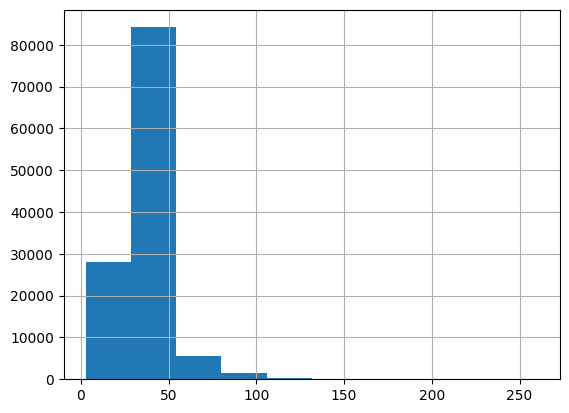

count    120000.000000
mean         37.003375
std          14.260621
min           3.000000
25%          29.000000
50%          35.000000
75%          42.000000
max         260.000000
dtype: float64

In [39]:

rev_len = [len(i) for i in train_x]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [40]:
x_train_pad = padding_(train_x,100)
x_test_pad=padding_(test_x,100)


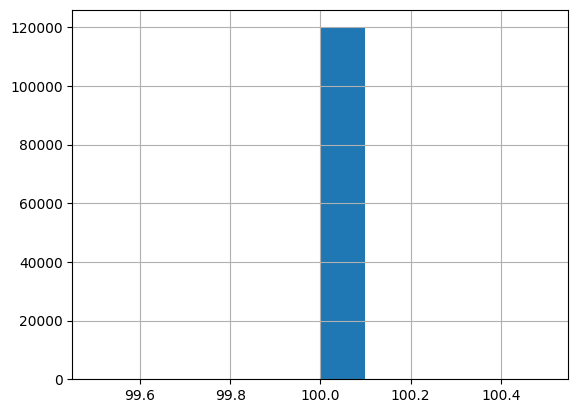

count    120000.0
mean        100.0
std           0.0
min         100.0
25%         100.0
50%         100.0
75%         100.0
max         100.0
dtype: float64

In [41]:

rev_len = [len(i) for i in x_train_pad]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [111]:
# create Tensor datasets
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [43]:
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([50, 100])
Sample input: 
 tensor([[    0,     0,     0,  ..., 11325, 23507, 22300],
        [    0,     0,     0,  ..., 43866, 65443, 22300],
        [    0,     0,     0,  ..., 79423,  3316, 22300],
        ...,
        [    0,     0,     0,  ..., 32477, 64887, 22300],
        [    0,     0,     0,  ..., 32477, 64887, 22300],
        [    0,     0,     0,  ..., 88351, 59194, 22300]])
Sample input: 
 tensor([1, 2, 2, 1, 2, 3, 1, 0, 0, 1, 1, 1, 0, 1, 3, 0, 3, 3, 2, 0, 1, 3, 2, 3,
        3, 3, 0, 1, 3, 3, 0, 1, 2, 0, 1, 1, 1, 2, 1, 3, 3, 1, 0, 3, 3, 2, 2, 0,
        0, 3])


In [91]:
class LSTM_NEWS(nn.Module):
    def __init__(self,no_layers,vocab_size,hidden_dim,embedding_dim,drop_prob,computed_embedding):
        super(LSTM_NEWS,self).__init__()

        self.output_dim = 4
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size
        self.batch_size=50

        # embedding and LSTM layers
        self.embedding = nn.Embedding.from_pretrained(torch.FloatTensor(computed_embedding))
        # self.embedding = nn.Embedding(vocab_size, embedding_dim)

        #lstm
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers, batch_first=True)


        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layer
        self.fc = nn.Linear(self.hidden_dim, 4)
        self.sig = nn.Sigmoid()


    def forward(self, x, hidden):
      batch_size = x.size(0)

      # embeddings and lstm_out
      embeds = self.embedding(x)  # shape: (batch_size, sequence_length, embedding_dim)
      lstm_out, hidden = self.lstm(embeds, hidden)

      # Select the last output of the sequence
      last_output = lstm_out[:, -1, :]  # shape: (batch_size, hidden_dim)

      # Apply dropout and fully connected layer
      out = self.dropout(last_output)
      out = self.fc(out)

      return out, hidden





    def init_hidden(self, batch_size):
        # print("hidden entered")
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden


In [92]:
no_layers = 2
vocab_size =len( word_to_index)+ 1 #extra 1 for padding
embedding_dim = 128
output_dim = 4
hidden_dim = 256


model = LSTM_NEWS(no_layers,vocab_size,hidden_dim,embedding_dim,0.5,skipgram_embeddings)

#moving to gpu
model.to(device)

print(model)

LSTM_NEWS(
  (embedding): Embedding(93220, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=4, bias=True)
  (sig): Sigmoid()
)


In [93]:


# loss and optimization functions
lr=0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(output, labels):
    _, predicted = output.max(dim=1)
    correct = (predicted == labels).sum().item()

    return correct/len(labels.window_size(0))




In [50]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc= 0.0
    model.train()
    # initialize hidden state
    # print("hidden started")
    h = model.init_hidden(batch_size)
    # print("train started")
    print(len(train_loader))
    indddd=0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)
        # Move labels tensor to the same device as the output tensor
        labels = labels.type(torch.LongTensor)
        # print(output)
        labels = labels.to(output.device)
        # print(labels)
        # calculate the loss and perform backprop
        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(output, labels)

        # loss = nn.CrossEntropyLoss(output, labels)
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)
            # print(labels)
            loss_fn = nn.CrossEntropyLoss()
            output, val_h = model(inputs, val_h)
            # print(output)
            val_loss = loss_fn(output, labels)

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc+= accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        directory = 'content/drive/My_Drive/NLP/A_3/svd_classification.pt'
        os.makedirs(os.path.dirname(directory), exist_ok=True)
        torch.save(model.state_dict(), directory)
        # torch.save(model.state_dict(), '../working/state_dict.pt')
        # print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')




hidden started
hidden entered
train started
2400
hidden entered
Epoch 1
train_loss : 0.2857458407074834 val_loss : 0.3145797378628662
train_accuracy : 90.05333333333564 val_accuracy : 88.63157894736844
hidden started
hidden entered
train started
2400
hidden entered
Epoch 2
train_loss : 0.22673766186616073 val_loss : 0.3153610506438111
train_accuracy : 92.23416666666952 val_accuracy : 89.02631578947377
hidden started
hidden entered
train started
2400
hidden entered
Epoch 3
train_loss : 0.17794300007556255 val_loss : 0.3062092383686257
train_accuracy : 93.90250000000303 val_accuracy : 90.01315789473686
hidden started
hidden entered
train started
2400
hidden entered
Epoch 4
train_loss : 0.13869966171255024 val_loss : 0.34054313747114257
train_accuracy : 95.2675000000028 val_accuracy : 89.07894736842105
hidden started
hidden entered
train started
2400
hidden entered
Epoch 5
train_loss : 0.10632021124474704 val_loss : 0.3763157168011132
train_accuracy : 96.45166666666904 val_accuracy : 89.6

In [51]:
!nvidia-smi

Sun Mar 31 14:30:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              29W /  70W |    791MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [89]:
### downstream task using the svd embedding is starting now

In [96]:
# def add_new_word(new_word,new_vector,new_index,embedding_marix,word_to_index):
#   "entered"
#   embedding_marix=np.insert(embedding_marix,[new_index],[new_vector],axis=0)
#   word_to_ind={word:(index+1) if index>=new_index else index for word,index
#                in word_to_index.items()}
#   word_to_index[new_word]=new_index
#   return embedding_marix
def add_new_word(new_word, new_vector, new_index, embedding_matrix, word_to_index):
    print(type(new_vector))

    embedding_matrix = np.insert(embedding_matrix, [new_index], [new_vector], axis=0)
    word_to_ind = {word: (index + 1) if index >= new_index else index for word, index
                   in word_to_index.items()}
    word_to_index[new_word] = new_index
    return embedding_matrix, word_to_index

UNK_INDEX = 0
UNK_TOKEN = "UNK"

UNK_Vector = svd_embeddings.mean(0)



svd_embeddings, word_to_index_svd = add_new_word(UNK_TOKEN, UNK_Vector, UNK_INDEX, skipgram_embeddings, word_to_index_svd)


<class 'torch.Tensor'>


In [97]:
no_layers = 2
vocab_size =len( word_to_index)+ 1 #extra 1 for padding
embedding_dim = 128
output_dim = 4
hidden_dim = 256


model = LSTM_NEWS(no_layers,vocab_size,hidden_dim,embedding_dim,0.5,svd_embeddings)

#moving to gpu
model.to(device)

print(model)

LSTM_NEWS(
  (embedding): Embedding(93222, 128)
  (lstm): LSTM(128, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=4, bias=True)
  (sig): Sigmoid()
)


In [106]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]
epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    # print("hidden started")
    h = model.init_hidden(batch_size)
    # print("train started")
    # print(len(train_loader))
    indddd=0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs,h)
        # Move labels tensor to the same device as the output tensor
        labels = labels.type(torch.LongTensor)
        # print(output)
        labels = labels.to(output.device)

        loss_fn = nn.CrossEntropyLoss()
        loss = loss_fn(output, labels)

        # loss = nn.CrossEntropyLoss(output, labels)
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc+= accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()



    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)
            # print(labels)
            loss_fn = nn.CrossEntropyLoss()
            output, val_h = model(inputs, val_h)
            # print(output)
            val_loss = loss_fn(output, labels)

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100/50} val_accuracy : {epoch_val_acc*100/50}')
    if epoch_val_loss <= valid_loss_min:
        directory = 'content/drive/My_Drive/NLP/A_3/svd_classification.pt'
        os.makedirs(os.path.dirname(directory), exist_ok=True)
        torch.save(model.state_dict(), directory)
        # print('Validation loss decreased ({6f} --> {6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')




Epoch 1
train_loss : 1.3870003330210845 val_loss : 1.3869550581041135
train_accuracy : 24.773333333333333 val_accuracy : 25.06578947368421
Epoch 2
train_loss : 1.3870190192262333 val_loss : 1.38695506594683
train_accuracy : 24.925833333333333 val_accuracy : 25.06578947368421
Epoch 3
train_loss : 1.3869309472541014 val_loss : 1.3869550541827553
train_accuracy : 24.918333333333337 val_accuracy : 25.06578947368421
Epoch 4
train_loss : 1.386967156281074 val_loss : 1.3869550612412
train_accuracy : 24.825 val_accuracy : 25.06578947368421
Epoch 5
train_loss : 1.3869997357825439 val_loss : 1.3869550298703344
train_accuracy : 24.986666666666668 val_accuracy : 25.06578947368421


In [ ]:
# conclusion
### Using the skipgram embedding gives more accuracy for the downstream task.

